### GDP란 무엇인가?
한 나라의 영역 내에서 가계, 기업, 정부 등 모든 경제주체가 일정기간 동안 생산한 재화 및 서비스의 부가가치를 시장가격으로 평가하여 합산한 것으로 여기에는 비거주자가 제공한 노동, 자본 등 생산요소에 의하여 창출된 것도 포함되어 있다.

(출처: 네이버 지식백과)

 

세계 GDP 수치 데이터 

(출처) : https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

### - 분석 과제

세계 GDP 자료를 분석하여 국가별 GDP 변화를 파악하고 GDP 변화에 패턴이 있는 지 파악해보자.

In [42]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir(r"C:\\Users\\USER\\Desktop\\Data")

In [43]:
# upload data
world_gdp = pd.read_csv("gdp.csv")

world_gdp1 = world_gdp

In [44]:
world_gdp

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US 1billion$),0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.55,2.53,2.73,2.79,2.96,2.98,3.09,3.20,0.00,0.00
1,Africa Eastern and Southern,AFE,GDP (current US 1billion$),19.29,19.70,21.47,25.70,23.50,26.78,29.12,...,896.26,913.20,927.66,956.32,893.10,854.75,962.27,984.03,977.81,898.47
2,Afghanistan,AFG,GDP (current US 1billion$),0.54,0.55,0.55,0.75,0.80,1.01,1.40,...,17.80,20.00,20.56,20.48,19.91,18.02,18.87,18.35,19.29,19.81
3,Africa Western and Central,AFW,GDP (current US 1billion$),10.41,11.13,11.95,12.68,13.84,14.87,15.84,...,658.43,716.94,807.82,846.94,757.49,687.48,680.99,738.13,792.08,786.58
4,Angola,AGO,GDP (current US 1billion$),0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,111.79,128.05,136.71,145.71,116.19,101.12,122.12,101.35,89.42,62.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US 1billion$),0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6.70,6.50,7.07,7.40,6.44,6.72,7.25,7.94,7.95,7.61
262,"Yemen, Rep.",YEM,GDP (current US 1billion$),0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,32.73,35.40,40.42,43.23,42.45,30.93,26.74,23.49,0.00,0.00
263,South Africa,ZAF,GDP (current US 1billion$),7.58,7.97,8.50,9.42,10.37,11.33,12.35,...,416.42,396.33,366.83,350.90,317.62,296.36,349.55,368.29,351.43,301.92
264,Zambia,ZMB,GDP (current US 1billion$),0.71,0.70,0.69,0.72,0.84,1.08,1.26,...,23.46,25.50,28.04,27.14,21.25,20.96,25.87,26.31,23.31,19.32


### - 데이터의 이해

분석에 사용되는 데이터는 위와 같이 266여개의 도시 및 국가별 GDP를 1960-2020년도까지 1billion($) 단위로 표기한 데이터로 Na 값은 0으로 표기됨

CountryName : 국가 및 도시 이름

CountryCode : 국가 코드

Indicator Name : 지표명

년도 (1960~ 2020)

In [45]:
# EDA
world_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   1960            266 non-null    float64
 4   1961            266 non-null    float64
 5   1962            266 non-null    float64
 6   1963            266 non-null    float64
 7   1964            266 non-null    float64
 8   1965            266 non-null    float64
 9   1966            266 non-null    float64
 10  1967            266 non-null    float64
 11  1968            266 non-null    float64
 12  1969            266 non-null    float64
 13  1970            266 non-null    float64
 14  1971            266 non-null    float64
 15  1972            266 non-null    float64
 16  1973            266 non-null    float64
 17  1974            266 non-null    flo

### - EDA

In [46]:
world_gdp.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,35.505301,36.439812,39.058308,42.076617,46.224436,50.487594,59.197669,62.788534,67.794586,75.020489,...,2257.603797,2319.763308,2405.366053,2474.740188,2329.826729,2359.192744,2526.584962,2684.118308,2726.112180,2525.722970
std,154.497560,160.961527,172.989380,186.032281,203.552416,221.425397,246.391042,262.979689,284.211611,312.960119,...,7863.777257,8020.770107,8260.109259,8486.817326,8046.493508,8178.097973,8701.960282,9258.397310,9395.303782,8986.018131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.362500,6.410000,6.670000,6.762500,6.295000,6.280000,6.542500,7.130000,6.537500,3.290000
50%,0.005000,0.010000,0.020000,0.020000,0.030000,0.150000,0.180000,0.235000,0.290000,0.305000,...,38.095000,43.250000,47.280000,49.225000,44.115000,43.880000,46.330000,51.625000,52.040000,37.030000
75%,3.082500,3.075000,3.580000,3.970000,4.152500,4.885000,6.047500,6.140000,7.402500,8.402500,...,526.887500,506.762500,521.485000,533.670000,484.552500,472.177500,497.727500,526.247500,531.692500,490.177500
max,1384.630000,1440.340000,1545.700000,1665.140000,1824.120000,1986.370000,2155.140000,2294.160000,2476.490000,2732.230000,...,73479.860000,75172.810000,77331.910000,79468.860000,75233.600000,76417.250000,81326.720000,86343.510000,87607.770000,84705.430000


#### - OECD (경제 협력 개발 기구) 란?

회원국 사이에 상호 정책 조정 및 협력을 통해 세계경제의 공동 발전 및 성장과 인류의 복지 증진을 도모하는 정부 간의 연구 협력 기구

##### OECD 가입 국가 38개 ( 21년 5월 기준) 
##### 국가 목록
그리스, 네덜란드, 노르웨이, 뉴질랜드, 대한민국, 덴마크, 독일, 라트비아. 룩셈부르크, 리투아니아, 멕시코, 미국, 벨기에, 스웨덴, 스위스, 스페인, 슬로바키아, 슬로베니아, 아이슬란드, 아일랜드, 에스토니아, 영국, 오스트리아, 이스라엘, 이탈리아, 일본, 체코, 칠레, 캐나다, 콜롬비아, 코스타리카, 터키, 포르투칼, 폴란드, 프랑스, 핀란드, 헝가리, 호주

#### 대표적인 국가의 년도별 GDP 변화를 살펴보자

In [47]:
# gdp DataFrame으로 변환
gdp = pd.DataFrame(world_gdp)

# 국가별 이름으로 인덱스를 지정
world_gdp = gdp.set_index("Country Name") 

# 불필요한 칼럼 제거
world_gdp = world_gdp.drop(columns=["Indicator Name"])

In [48]:
## 국가 리스트로 설정
g8 = " Canada,France,Germany,Italy,Japan,Russian Federation,United Kingdom,United States".split(",")
oecd_countries = "Australia,Austria,Belgium,Canada,Chile,Czech Republic,Denmark,Estonia,Finland,France,Germany,Greece,Hungary,Iceland,Ireland,Israel,Italy,Japan,Luxembourg,Mexico,Netherlands,New Zealand,Norway,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States,Korea Rep.".split(",")
top10_gdp_countries = "Canada,France,Germany,Italy,Japan,United Kingdom,United States,Korea Rep.,China,India".split(",")

#### 1. 세계 GDP 총합의 그래프를 확인해보자

In [9]:
# World로 검색하기
wld_gdp = world_gdp.loc["World", :]
# DataFrame
wld_gdp = pd.DataFrame(wld_gdp[1:])

wld_gdp = wld_gdp.reset_index().rename(columns={'index':"Year"})

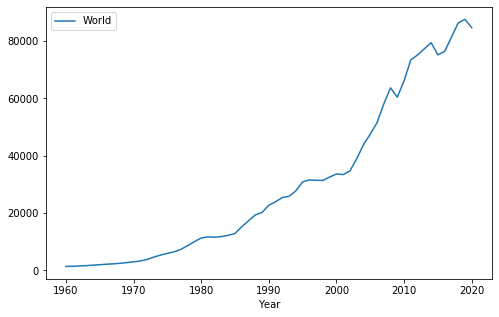

In [12]:
# plot 그려보기
plt.figure(figsize=(8,5))
ax = plt.gca()

wld_gdp.plot(kind='line',x='Year',y='World',ax=ax)

#### 2. 국가 이름 입력해서 만들기

In [13]:
def make_gdp(country_name):
    
    try:
        country_gdp = world_gdp.loc[country_name, :]
    
    except:
        print("국가리스트에 없는 국가입니다. 다시 입력하세요.")
    
    # 국가코드로 변수명 만들기
    temp=country_gdp[0]
    name = temp.lower()
    globals()[name+"_gdp"] = country_gdp[1:].reset_index().rename(columns={'index':"Year"})
    print(name+"_gdp")
    
    return name+"_gdp"
    
    

In [15]:
# OECD members를 확인해보자
country_name = input("알고 싶은 국가의 리스트를 입력하시오.(위에 리스트 참조) ")

make_gdp(country_name)

알고 싶은 국가의 리스트를 입력하시오.(위에 리스트 참조) Canada
can_gdp


'can_gdp'

In [16]:
# 추가로 다른 국가 호출
# 중국 호출
#country_name1 = input("알고 싶은 국가의 리스트를 입력하시오.(위에 리스트 참조) ")
#make_gdp(country_name1)

# 인도 호출
#country_name2 = input("알고 싶은 국가의 리스트를 입력하시오.(위에 리스트 참조) ")
#make_gdp(country_name2)

#### 3.리스트에 있는 국가로 입력해서 만들기

In [17]:
def make_gdp_list(country_list):
    
    for country in country_list:
        try:
            countries_gdp = world_gdp.loc[country, :]
            
            # 국가코드를 사용하여 변수명 설정
            temp=countries_gdp[0]
            name = temp.lower()
            # globals 변수명 설정
            globals()[name+"_gdp"] = countries_gdp[1:].reset_index().rename(columns={'index':"Year"})
            
            print(name+"_gdp")
        except:
            print("없는 국가이름입니다.")
        
    print("리스트 등록 완료")

In [18]:
# OECD 국가별 GDP 확인하기
#country_list = oecd_countries

# top10 국가별 GDP 리스트
country_list = top10_gdp_countries

make_gdp_list(country_list)

can_gdp
fra_gdp
deu_gdp
ita_gdp
jpn_gdp
gbr_gdp
usa_gdp
kor_gdp
chn_gdp
ind_gdp
리스트 등록 완료


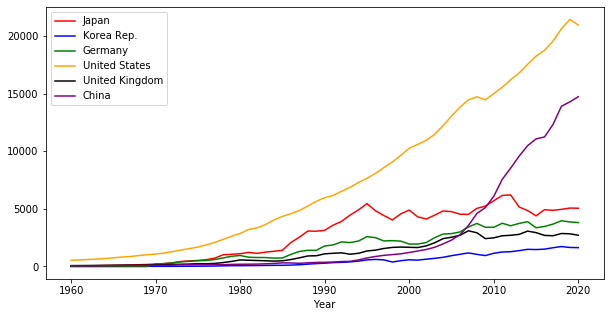

In [19]:
# plot 그려보기
plt.figure(figsize=(10,5))
ax = plt.gca()

jpn_gdp.plot(kind='line',x='Year',y='Japan',ax=ax, color="Red")
kor_gdp.plot(kind='line',x='Year',y='Korea Rep.',ax=ax, color="Blue")
deu_gdp.plot(kind='line',x='Year',y='Germany',ax=ax, color="Green")
usa_gdp.plot(kind='line',x='Year',y='United States',ax=ax, color="Orange")
gbr_gdp.plot(kind='line',x='Year',y='United Kingdom',ax=ax, color="Black")
chn_gdp.plot(kind='line',x='Year',y='China',ax=ax, color="Purple")
#oed_gdp.plot(kind='line',x='Year',y='OECD members',ax=ax, color="Olive")

위 그래프를 통해 주목해야 할 점은 미국과 중국으로 미국은 2000년대와 비교하여 GDP가 2배 가까이 성장한 것을 확인할 수 있고 중국의 경우 14배 가까이 성장한 것을 확인할 수 있다. 즉 전세계 GDP 총합 성장의 이유로 미국과 중국의 성장이 주요했다는 것을 볼 수 있다.
 

한편으로 일본의 경우 1995년 이후 GDP 변화가 크지 않다는 것을 확인할 수 있다. 그 외 국가들도 어느 정도의 성장세는 확인되지만 눈에 띄는 변화는 보이지 않는다는 것을 확인할 수 있다.

### - 전 세계 Top 10 국가의 GDP 비율을 파악해보자 

In [49]:
world_gdp= wld_gdp
world_gdp = pd.merge(wld_gdp, usa_gdp, how="left") 
world_gdp = pd.merge(world_gdp, kor_gdp, how="left")
world_gdp = pd.merge(world_gdp, deu_gdp, how="left")
world_gdp = pd.merge(world_gdp, jpn_gdp, how="left")
world_gdp = pd.merge(world_gdp, gbr_gdp, how="left")
world_gdp = pd.merge(world_gdp, chn_gdp, how="left")
world_gdp = pd.merge(world_gdp, fra_gdp, how="left")
world_gdp = pd.merge(world_gdp, ita_gdp, how="left")
world_gdp = pd.merge(world_gdp, can_gdp, how="left")
world_gdp = pd.merge(world_gdp, ind_gdp, how="left")

In [50]:
#world_gdp = pd.DataFrame(world_gdp)
#world_gdp.set_index('Year', drop=False)
world_gdp

,Year,World,United States,Korea Rep.,Germany,Japan,United Kingdom,China,France,Italy,Canada,India
0,1960,1384.63,543.30,3.96,0.00,44.31,73.23,59.72,62.23,40.39,40.46,37.03
1,1961,1440.34,563.30,2.42,0.00,53.51,77.74,50.06,67.46,44.84,40.93,39.23
2,1962,1545.70,605.10,2.81,0.00,60.72,81.25,47.21,75.61,50.38,42.23,42.16
3,1963,1665.14,638.60,3.99,0.00,69.50,86.56,50.71,84.76,57.71,45.03,48.42
4,1964,1824.12,685.80,3.46,0.00,81.75,94.41,59.71,94.01,63.18,49.38,56.48
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2016,76417.25,18745.08,1500.11,3467.50,4922.54,2693.25,11233.28,2471.29,1875.80,1527.99,2294.80
57,2017,81326.72,19542.98,1623.90,3673.51,4866.86,2662.48,12310.41,2588.74,1956.95,1649.27,2651.47
58,2018,86343.51,20611.86,1724.85,3961.83,4954.81,2857.32,13894.82,2786.50,2091.12,1721.85,2701.11
59,2019,87607.77,21433.22,1646.74,3861.12,5064.87,2830.81,14279.94,2715.52,2004.91,1741.58,2870.50


In [51]:
# world_gdp.csv로 저장
world_gdp.to_csv("world_gdp.csv", header=True, index=False)

In [52]:
# csv에서 각 값을 세계 총합으로 나눈뒤 소수 2자리로 나타냄
world_gdp_prop = pd.read_csv("world_gdp_prop.csv")

world_gdp_prop

,Year,United States,Korea Rep.,Germany,Japan,United Kingdom,China,France,Italy,Canada,India,others
0,1960,39.24,0.29,0.00,3.20,5.29,4.31,4.49,2.92,2.92,2.67,34.67
1,1961,39.11,0.17,0.00,3.72,5.40,3.48,4.68,3.11,2.84,2.72,34.77
2,1962,39.15,0.18,0.00,3.93,5.26,3.05,4.89,3.26,2.73,2.73,34.82
3,1963,38.35,0.24,0.00,4.17,5.20,3.05,5.09,3.47,2.70,2.91,34.82
4,1964,37.60,0.19,0.00,4.48,5.18,3.27,5.15,3.46,2.71,3.10,34.86
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2016,24.53,1.96,4.54,6.44,3.52,14.70,3.23,2.45,2.00,3.00,33.63
57,2017,24.03,2.00,4.52,5.98,3.27,15.14,3.18,2.41,2.03,3.26,34.18
58,2018,23.87,2.00,4.59,5.74,3.31,16.09,3.23,2.42,1.99,3.13,33.63
59,2019,24.46,1.88,4.41,5.78,3.23,16.30,3.10,2.29,1.99,3.28,33.28


In [53]:
world_gdp_2020 = world_gdp_prop.iloc[-1,:]
world_gdp_2020 = world_gdp_2020.drop('Year')

world_gdp_2020

United States     24.72
Korea Rep.         1.92
Germany            4.49
Japan              5.96
United Kingdom     3.20
China             17.38
France             3.07
Italy              2.23
Canada             1.94
India              3.10
others            31.99
Name: 60, dtype: float64

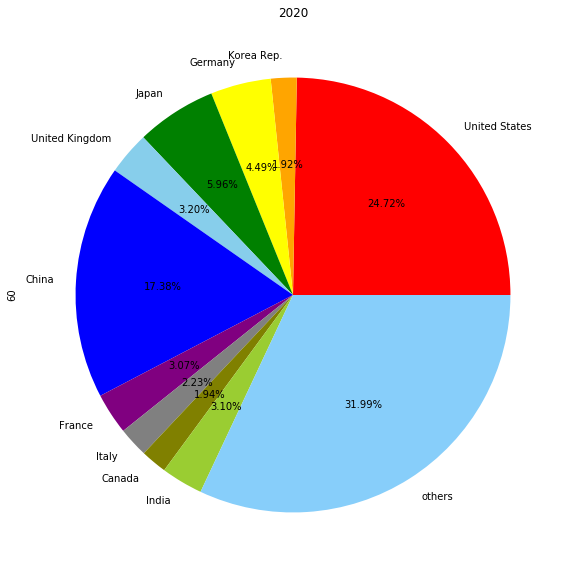

In [54]:
# pie 차트 형태로 나타내기
plt.figure(figsize=(10,10))
colors = ['red', 'orange', 'yellow', 'green', 'skyblue', 'blue','purple','gray','olive','yellowgreen','lightskyblue']
plt.title('2020')
world_gdp_2020.plot.pie(autopct='%.2f%%', colors=colors)

In [55]:
# 2018, 2019년도의 비율을 파악해보자
world_gdp_2019 = world_gdp_prop.iloc[-2, :]
world_gdp_2018 = world_gdp_prop.iloc[-3, :]

world_gdp_2019 = world_gdp_2019.drop('Year')
world_gdp_2018 = world_gdp_2018.drop('Year')

print(world_gdp_2019)

United States     24.46
Korea Rep.         1.88
Germany            4.41
Japan              5.78
United Kingdom     3.23
China             16.30
France             3.10
Italy              2.29
Canada             1.99
India              3.28
others            33.28
Name: 59, dtype: float64


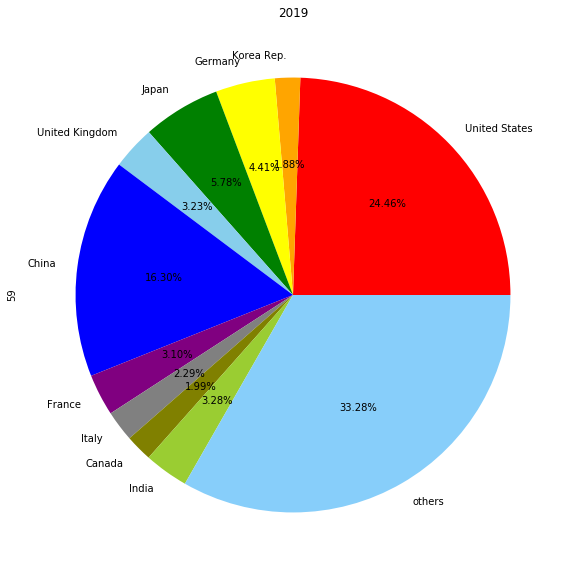

In [56]:
plt.figure(figsize=(10,10))
plt.title('2019')
world_gdp_2019.plot.pie(autopct='%.2f%%', colors=colors)

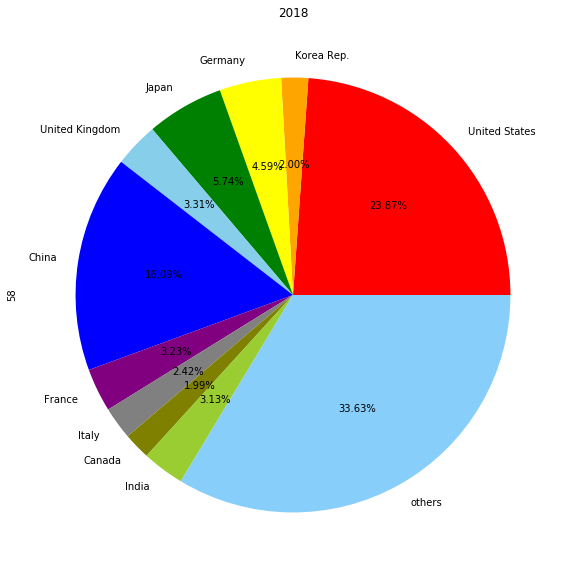

In [57]:
plt.figure(figsize=(10,10))
plt.title('2018')

world_gdp_2018.plot.pie(autopct='%.2f%%', colors=colors)

### - GDP 변화를 살펴보자

([<matplotlib.patches.Wedge at 0x1a0116ee608>,
 [Text(0.7846293246502134, 0.7709454085076001, ''),
  Text(-0.046983906447389576, 1.0989961385441456, ''),
  Text(-0.26585324383221987, 1.0673903000982754, ''),
  Text(-0.5958144347907166, 0.9246648902683712, ''),
  Text(-0.8337473946993346, 0.7175411359859951, ''),
  Text(-1.0977417344017466, 0.07044916289527714, ''),
  Text(-0.9210920342000977, -0.6013230949607093, ''),
  Text(-0.808692499986852, -0.7456650994012094, ''),
  Text(-0.7043567221523628, -0.8449151483780957, ''),
  Text(-0.5623234848791665, -0.9454058907968312, ''),
  Text(0.5897011521674757, -0.9285755495016826, '')],
 [Text(0.42797963162738906, 0.4205156773677818, '24.72%'),
  Text(-0.025627585334939765, 0.5994524392058975, '1.92%'),
  Text(-0.14501086027211993, 0.5822128909626957, '4.49%'),
  Text(-0.3249896917040272, 0.5043626674191115, '5.96%'),
  Text(-0.45477130619963696, 0.3913860741741791, '3.20%'),
  Text(-0.598768218764589, 0.03842681612469662, '17.38%'),
  Text(-0

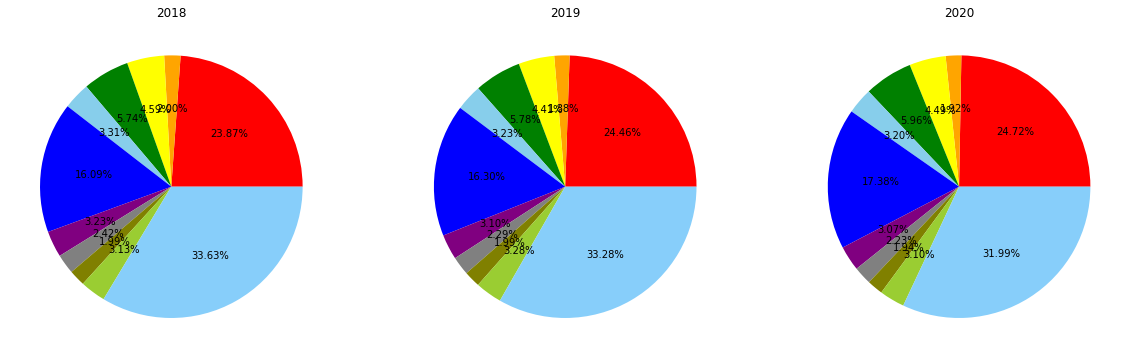

In [58]:
# 년도별 파이차트 확인 2020, 2019, 2018
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title('2018')
plt.pie(world_gdp_2018, autopct='%.2f%%', colors=colors)
plt.subplot(132)
plt.title('2019')
plt.pie(world_gdp_2019, autopct='%.2f%%', colors=colors)
plt.subplot(133)
plt.title('2020')
plt.pie(world_gdp_2020, autopct='%.2f%%',colors=colors)

### - GDP 순위 Top 10

In [71]:
gdp_rank = pd.read_csv("gdp_rank.csv", encoding="cp949")

gdp_rank = pd.DataFrame(gdp_rank)
gdp_rank.set_index('Country')

# Top 10
gdp_rank.head(10)

,Country,Ranking,Economy,US dollars
0,USA,1,United States,"20,936,600"
1,CHN,2,China,"14,722,731"
2,JPN,3,Japan,"5,064,873"
3,DEU,4,Germany,"3,806,060"
4,GBR,5,United Kingdom,"2,707,744"
5,IND,6,India,"2,622,984"
6,FRA,7,France,"2,603,004"
7,ITA,8,Italy,"1,886,445"
8,CAN,9,Canada,"1,643,408"
9,KOR,10,"Korea, Rep.","1,630,525"


### - 요약

위 분석 과정을 통해 확인할 수 있는 것은

(1) 미국의 GDP 비율은 약간 감소, 중국의 GDP 비율은 증가했다.

(2) Others 즉 top10 국가를 제외한 비율이 1/3 가량을 계속해서 유지

(3) (미국 + 중국)은 전세계 40% GDP를 차지한다. 

(4) 미국, 중국을 제외한 8개의 국가의 GDP 비율은 25%

(5) 2018~2020년도 파이 그래프를 통해 G3 미국, 중국, 일본은 GDP 성장한 반면 그 외 국가들은 GDP가 다소 감소 